In [1]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
DIR = "C:/Users/ADMIN/Desktop/Feng-Yuan 3MTUG"

In [3]:
fileNo = 0
fnamelst = []
for fname in os.listdir(DIR):
    fnamelst.append(fname)
    fileNo = fileNo +1
    fname_with_path = DIR + '/' + fname
    df = pd.read_csv(fname_with_path)
    df = df[0:500]  # select the first 500 data 
    tensor = torch.FloatTensor(df[['X', 'Y', 'Z']].values.tolist())
    tensor = tensor.view(1, 500, 3)
    if(fileNo == 1):
        resultx = tensor
    else:
        resultx = torch.cat((resultx, tensor), 0)

    # read the lable of this file
    label = df.iloc[:,0][0]
    if(label == 'fail'):
        y= torch.FloatTensor([0]).view(1, 1) # label 0 if fail 
    elif(label == 'ok'):
        y= torch.FloatTensor([1]).view(1, 1) # label 1 if ok
    else:
        print(fname, "  Wrong label")

    if(fileNo == 1):
        resulty = y
    else:
        resulty = torch.cat((resulty, y), 0)

In [4]:
resultx = resultx.view(150, 1500)
resulty=resulty.view(150)

Try perplexity = 2,  5,  30,  50,  100,  

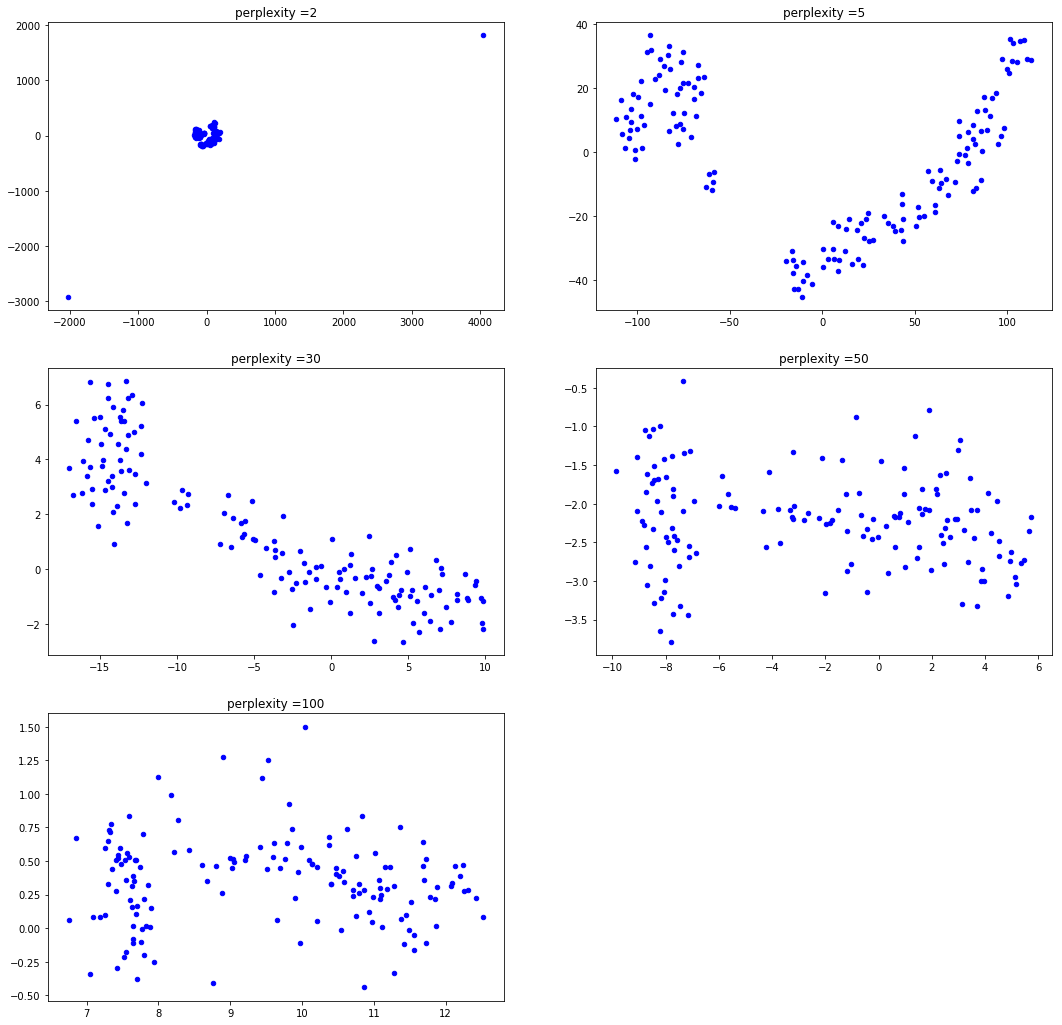

In [5]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(resultx.numpy())
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c='blue')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()

Try perplexity = 2,  5,  30,  50,  100,  

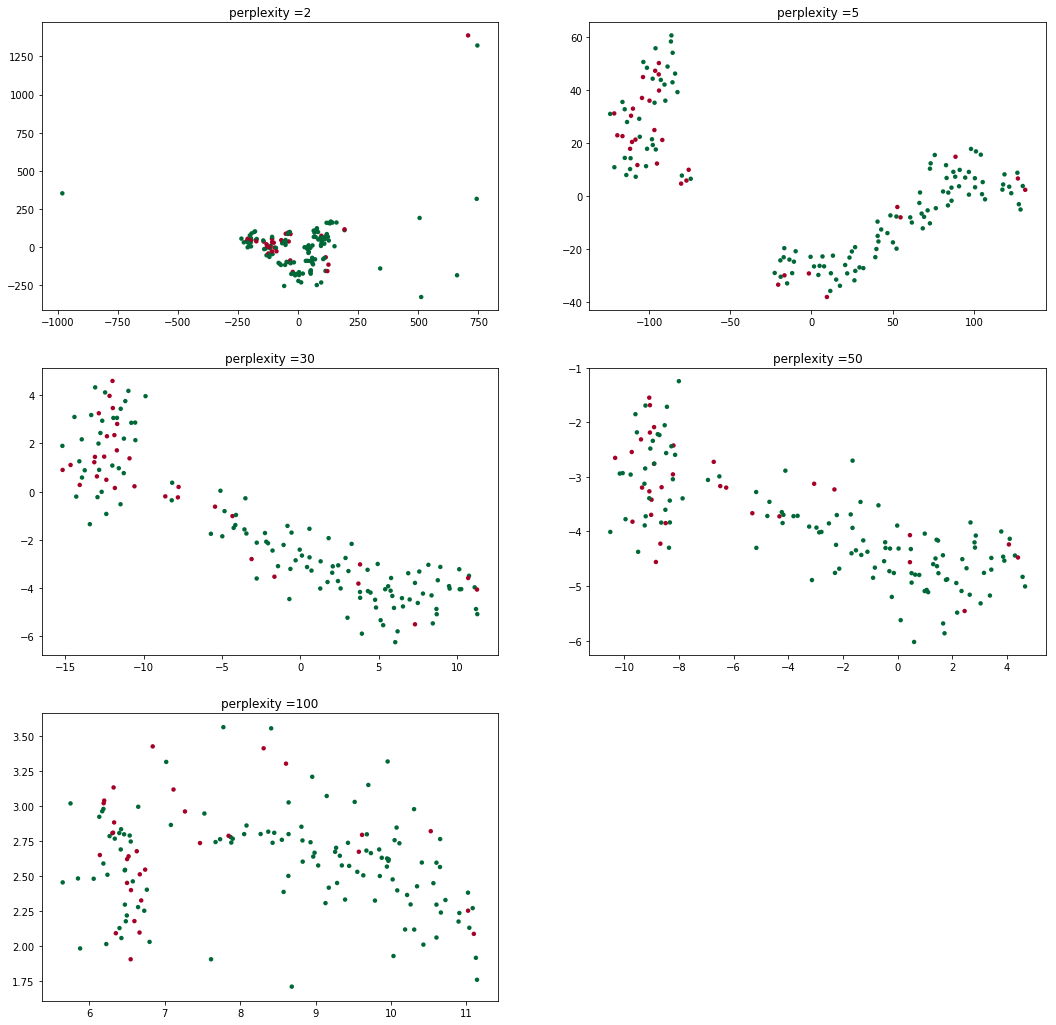

In [6]:
i = 1
fig = plt.figure(figsize=(18, 18)) # 18x9 inches to fit 3 rows * 2 columns subplots
lst = [2, 5, 30, 50, 100]
print('Try perplexity = ', end = '')
for n in lst:
    print(n, end = ',  ')
    tsne = TSNE(perplexity=n, n_components=2, init='pca', n_iter=5000)
    x1 = tsne.fit_transform(resultx.numpy(), resulty)
    a=fig.add_subplot(3,2, i) # we have a 3 rows * 2 columns subplots
    plt.scatter(x1[:, 0], x1[:, 1], s=20, c=resulty.numpy(), lw=0, cmap='RdYlGn')
    title = 'perplexity =' + str(n)
    plt.title(title)
    i=i+1
plt.show()